In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
 
ps = PorterStemmer()

In [4]:
df = pd.read_csv('spam.csv')
df

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])
df

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [6]:
# removing all the duplicate values and keeping only the first
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

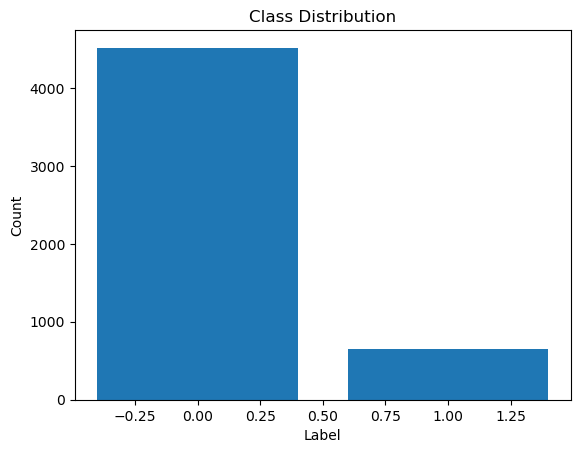

In [7]:
import matplotlib.pyplot as plt
label_counts = df['Label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()



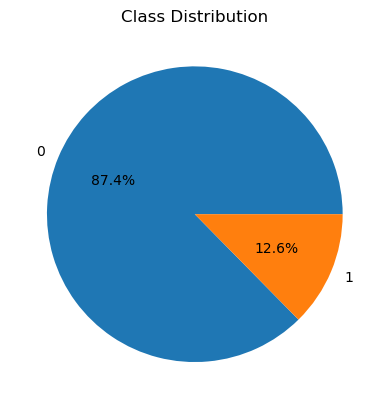

In [8]:


import matplotlib.pyplot as plt

label_counts = df['Label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()



In [9]:
def get_importantFeatures(sent):
    sent = sent.lower()
    
    returnList = []
    sent = nltk.word_tokenize(sent)
    for i in sent:
        if i.isalnum():
            returnList.append(i)
    return returnList
 
def removing_stopWords(sent):
    returnList = []
    for i in sent:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            returnList.append(i)
    return returnList
 
def potter_stem(sent):
    returnList = []
    for i in sent:
        returnList.append(ps.stem(i))
    return " ".join(returnList)

In [10]:
df['imp_feature'] = df['EmailText'].apply(get_importantFeatures)
df['imp_feature'] = df['imp_feature'].apply(removing_stopWords)
df['imp_feature'] = df['imp_feature'].apply(potter_stem)

C:\Users\dhema\AppData\Local\Temp\ipykernel_17428\3465550335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imp_feature'] = df['EmailText'].apply(get_importantFeatures)
C:\Users\dhema\AppData\Local\Temp\ipykernel_17428\3465550335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imp_feature'] = df['imp_feature'].apply(removing_stopWords)
C:\Users\dhema\AppData\Local\Temp\ipykernel_17428\3465550335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [11]:
from sklearn.model_selection import train_test_split
X = df['imp_feature']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(X_train)
 
tuned_parameters = {'kernel':['linear','rbf'],'gamma':[1e-3,1e-4], 'C':[1,10,100,1000]}
 
model = GridSearchCV(svm.SVC(),tuned_parameters)
model.fit(feature, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

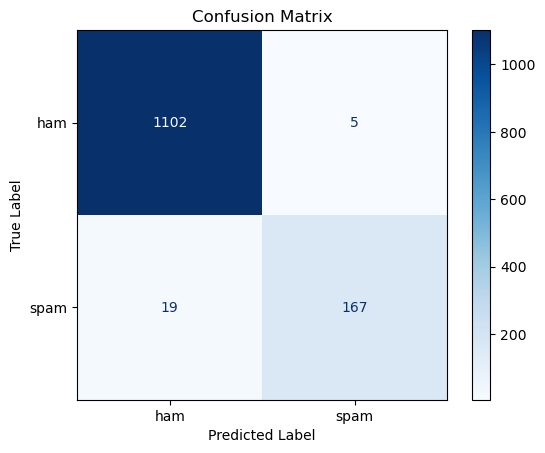

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(tfidf.transform(X_test))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)


Accuracy: 0.9814385150812065
F1 Score: 0.9329608938547486
Precision: 0.9709302325581395
Recall: 0.8978494623655914
Specificity: 0.995483288166215


In [18]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [19]:
from tkinter import *
import tkinter as tk
 
spam_model = pickle.load(open("finalized_model.sav",'rb'))
 
def check_spam():
    text = spam_text_Entry.get()
    is_spam = spam_model.predict(tfidf.transform([text]))
    if is_spam == 1:
        print("text is spam")
        my_string_var.set("Result: text is spam")
    else:
        print("text is not spam")
        my_string_var.set("Result: text is not spam")
win = Tk()
 
win.geometry("400x600")
win.configure(background="cyan")
win.title("Sms Spam Detector")
 
title = Label(win, text="SMS Spam Detector", bg="gray",width="300",height="2",fg="white",font=("Calibri 20 bold italic underline")).pack()
 
spam_text = Label(win, text="Enter your Text: ",bg="cyan", font=("Verdana 12")).place(x=12,y=100)
spam_text_Entry = Entry(win, textvariable=spam_text,width=33)
spam_text_Entry.place(x=155, y=105)
 
my_string_var = StringVar()
my_string_var.set("Result: ")
 
print_spam = Label(win, textvariable=my_string_var,bg="cyan", font=("Verdana 12")).place(x=12,y=200)
 
Button = Button(win, text="Submit",width="12",height="1",activebackground="red",bg="Pink",command=check_spam,font=("Verdana 12")).place(x=12,y=150)
 
win.mainloop()

text is spam
text is not spam
